<h1>ENB40 - RNNs</h1>
<h2>activation functions </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [4]:
net1 = models.Sequential()
net1.add(layers.GRU(60, input_shape = (480,6)))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 60)                12060     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 427       
Total params: 12,487
Trainable params: 12,487
Non-trainable params: 0
_________________________________________________________________


In [5]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [6]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 1s 11ms/step - loss: 1.9503 - accuracy: 0.1852 - val_loss: 2.0070 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9391 - accuracy: 0.1852 - val_loss: 1.9905 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 1.9292 - accuracy: 0.1852 - val_loss: 1.9769 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9203 - accuracy: 0.1852 - val_loss: 1.9632 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9128 - accuracy: 0.1852 - val_loss: 1.9496 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9051 - accuracy: 0.1852 - val_loss: 1.9364 - val_accuracy: 0.1111
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 1.8988 - accuracy: 0.1852 - val_l

Epoch 57/100
54/54 [==============================] - 0s 5ms/step - loss: 1.3135 - accuracy: 0.4259 - val_loss: 1.1597 - val_accuracy: 0.3333
Epoch 58/100
54/54 [==============================] - 0s 5ms/step - loss: 1.3077 - accuracy: 0.3704 - val_loss: 1.1667 - val_accuracy: 0.3333
Epoch 59/100
54/54 [==============================] - 0s 5ms/step - loss: 1.3034 - accuracy: 0.3889 - val_loss: 1.2052 - val_accuracy: 0.3333
Epoch 60/100
54/54 [==============================] - 0s 5ms/step - loss: 1.2976 - accuracy: 0.3889 - val_loss: 1.1785 - val_accuracy: 0.3333
Epoch 61/100
54/54 [==============================] - 0s 5ms/step - loss: 1.2941 - accuracy: 0.4444 - val_loss: 1.1690 - val_accuracy: 0.3333
Epoch 62/100
54/54 [==============================] - 0s 5ms/step - loss: 1.2871 - accuracy: 0.4444 - val_loss: 1.1748 - val_accuracy: 0.4444
Epoch 63/100
54/54 [==============================] - 0s 5ms/step - loss: 1.2826 - accuracy: 0.5185 - val_loss: 1.2052 - val_accuracy: 0.4444
Epoch 

Epoch 14/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9348 - accuracy: 0.1667 - val_loss: 1.9484 - val_accuracy: 0.1667
Epoch 15/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9327 - accuracy: 0.1667 - val_loss: 1.9439 - val_accuracy: 0.1667
Epoch 16/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9301 - accuracy: 0.1667 - val_loss: 1.9396 - val_accuracy: 0.1667
Epoch 17/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9285 - accuracy: 0.1667 - val_loss: 1.9351 - val_accuracy: 0.1667
Epoch 18/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9259 - accuracy: 0.1667 - val_loss: 1.9309 - val_accuracy: 0.1667
Epoch 19/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9238 - accuracy: 0.1667 - val_loss: 1.9268 - val_accuracy: 0.1667
Epoch 20/100
54/54 [==============================] - 0s 5ms/step - loss: 1.9215 - accuracy: 0.1667 - val_loss: 1.9227 - val_accuracy: 0.1667
Epoch 

Epoch 72/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8562 - accuracy: 0.2963 - val_loss: 1.7961 - val_accuracy: 0.3333
Epoch 73/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8552 - accuracy: 0.2963 - val_loss: 1.7944 - val_accuracy: 0.3333
Epoch 74/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8541 - accuracy: 0.2963 - val_loss: 1.7928 - val_accuracy: 0.3333
Epoch 75/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8531 - accuracy: 0.2963 - val_loss: 1.7914 - val_accuracy: 0.3333
Epoch 76/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8521 - accuracy: 0.2963 - val_loss: 1.7901 - val_accuracy: 0.3333
Epoch 77/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8509 - accuracy: 0.2963 - val_loss: 1.7886 - val_accuracy: 0.3333
Epoch 78/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8502 - accuracy: 0.2963 - val_loss: 1.7871 - val_accuracy: 0.3333
Epoch 

Epoch 29/100
54/54 [==============================] - 0s 6ms/step - loss: 1.8315 - accuracy: 0.3333 - val_loss: 1.9837 - val_accuracy: 0.2222
Epoch 30/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8282 - accuracy: 0.3333 - val_loss: 1.9869 - val_accuracy: 0.2222
Epoch 31/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8247 - accuracy: 0.3333 - val_loss: 1.9902 - val_accuracy: 0.2222
Epoch 32/100
54/54 [==============================] - 0s 6ms/step - loss: 1.8216 - accuracy: 0.2963 - val_loss: 1.9935 - val_accuracy: 0.2222
Epoch 33/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8193 - accuracy: 0.2222 - val_loss: 1.9973 - val_accuracy: 0.1667
Epoch 34/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8158 - accuracy: 0.2778 - val_loss: 2.0010 - val_accuracy: 0.1667
Epoch 35/100
54/54 [==============================] - 0s 5ms/step - loss: 1.8134 - accuracy: 0.3148 - val_loss: 2.0049 - val_accuracy: 0.1667
Epoch 

Epoch 87/100
54/54 [==============================] - 0s 6ms/step - loss: 1.7213 - accuracy: 0.4074 - val_loss: 2.0633 - val_accuracy: 0.2222
Epoch 88/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7189 - accuracy: 0.4074 - val_loss: 2.0623 - val_accuracy: 0.2222
Epoch 89/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7167 - accuracy: 0.4074 - val_loss: 2.0605 - val_accuracy: 0.2222
Epoch 90/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7139 - accuracy: 0.4074 - val_loss: 2.0586 - val_accuracy: 0.2222
Epoch 91/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7115 - accuracy: 0.4074 - val_loss: 2.0567 - val_accuracy: 0.2222
Epoch 92/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7091 - accuracy: 0.4074 - val_loss: 2.0534 - val_accuracy: 0.2222
Epoch 93/100
54/54 [==============================] - 0s 6ms/step - loss: 1.7061 - accuracy: 0.4074 - val_loss: 2.0512 - val_accuracy: 0.2222
Epoch 

Epoch 43/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7938 - accuracy: 0.2407 - val_loss: 2.0167 - val_accuracy: 0.0000e+00
Epoch 44/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7922 - accuracy: 0.2407 - val_loss: 2.0184 - val_accuracy: 0.0000e+00
Epoch 45/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7903 - accuracy: 0.2407 - val_loss: 2.0195 - val_accuracy: 0.0000e+00
Epoch 46/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7885 - accuracy: 0.2407 - val_loss: 2.0206 - val_accuracy: 0.0000e+00
Epoch 47/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7863 - accuracy: 0.2407 - val_loss: 2.0209 - val_accuracy: 0.0000e+00
Epoch 48/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7846 - accuracy: 0.2407 - val_loss: 2.0216 - val_accuracy: 0.0000e+00
Epoch 49/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7829 - accuracy: 0.2407 - val_loss: 2.0223 - val

15/15 [==============================] - 0s 2ms/step
[1.6071054935455322, 0.3333333432674408]


In [7]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [1.58233082 0.33333334]
Standard deviation for loss & accuracy:  [0.27958846 0.08164965]
Duration in seconds:  114


In [26]:
#net1.save('enb39-1.h5')

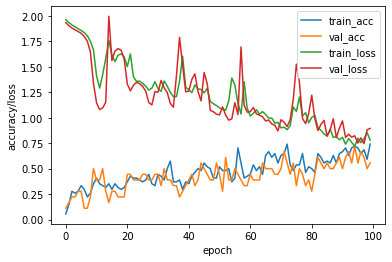

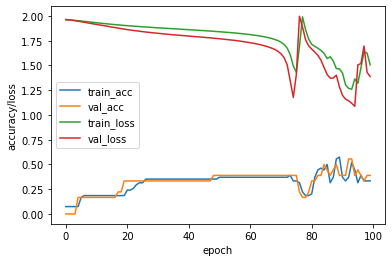

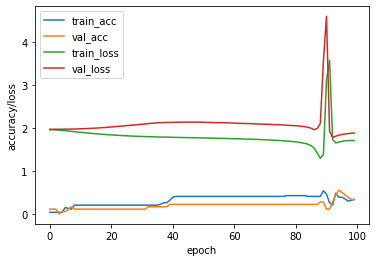

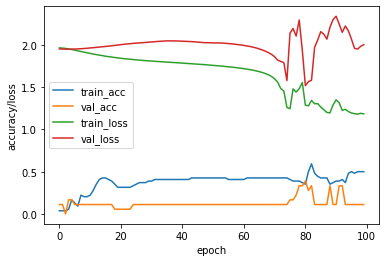

In [27]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [28]:
net2 = models.Sequential()
net2.add(layers.GRU(360, input_shape=(480,6)))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 360)               396360    
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 2527      
Total params: 398,887
Trainable params: 398,887
Non-trainable params: 0
_________________________________________________________________


In [29]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [30]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 4s 76ms/step - loss: 1.9484 - accuracy: 0.1111 - val_loss: 1.9114 - val_accuracy: 0.0556
Epoch 2/100
54/54 [==============================] - 4s 68ms/step - loss: 1.9173 - accuracy: 0.1852 - val_loss: 1.8867 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 4s 68ms/step - loss: 1.8937 - accuracy: 0.1852 - val_loss: 1.8579 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 4s 67ms/step - loss: 1.8707 - accuracy: 0.1852 - val_loss: 1.8280 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 4s 66ms/step - loss: 1.8527 - accuracy: 0.1852 - val_loss: 1.7952 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 4s 67ms/step - loss: 1.8294 - accuracy: 0.1852 - val_loss: 1.7537 - val_accuracy: 0.1111
Epoch 7/100
54/54 [==============================] - 4s 66ms/step - loss: 1.7822 - accuracy: 0.2037 - 

54/54 [==============================] - 3s 64ms/step - loss: 1.9373 - accuracy: 0.4630 - val_loss: 2.4293 - val_accuracy: 0.1111
Epoch 59/100
54/54 [==============================] - 3s 65ms/step - loss: 2.0571 - accuracy: 0.3519 - val_loss: 1.6812 - val_accuracy: 0.1667
Epoch 60/100
54/54 [==============================] - 3s 64ms/step - loss: 1.5818 - accuracy: 0.4074 - val_loss: 1.3484 - val_accuracy: 0.4444
Epoch 61/100
54/54 [==============================] - 3s 65ms/step - loss: 1.6818 - accuracy: 0.4444 - val_loss: 1.2181 - val_accuracy: 0.5000
Epoch 62/100
54/54 [==============================] - 4s 66ms/step - loss: 1.6026 - accuracy: 0.3704 - val_loss: 1.2877 - val_accuracy: 0.4444
Epoch 63/100
54/54 [==============================] - 3s 64ms/step - loss: 1.5125 - accuracy: 0.3519 - val_loss: 1.5315 - val_accuracy: 0.2222
Epoch 64/100
54/54 [==============================] - 4s 65ms/step - loss: 1.5340 - accuracy: 0.3148 - val_loss: 1.8139 - val_accuracy: 0.1667
Epoch 65/100

54/54 [==============================] - 4s 65ms/step - loss: 1.8196 - accuracy: 0.3333 - val_loss: 1.7546 - val_accuracy: 0.2778
Epoch 72/100
54/54 [==============================] - 4s 66ms/step - loss: 1.8164 - accuracy: 0.3333 - val_loss: 1.7507 - val_accuracy: 0.3333
Epoch 73/100
54/54 [==============================] - 4s 65ms/step - loss: 1.8126 - accuracy: 0.3333 - val_loss: 1.7465 - val_accuracy: 0.3333
Epoch 74/100
54/54 [==============================] - 4s 66ms/step - loss: 1.8091 - accuracy: 0.3333 - val_loss: 1.7416 - val_accuracy: 0.3333
Epoch 75/100
54/54 [==============================] - 4s 66ms/step - loss: 1.8050 - accuracy: 0.3333 - val_loss: 1.7365 - val_accuracy: 0.3333
Epoch 76/100
54/54 [==============================] - 4s 66ms/step - loss: 1.8007 - accuracy: 0.3333 - val_loss: 1.7318 - val_accuracy: 0.3333
Epoch 77/100
54/54 [==============================] - 4s 65ms/step - loss: 1.7948 - accuracy: 0.3333 - val_loss: 1.7259 - val_accuracy: 0.3333
Epoch 78/100

54/54 [==============================] - 4s 67ms/step - loss: 1.7311 - accuracy: 0.3889 - val_loss: 1.9515 - val_accuracy: 0.2222
Epoch 85/100
54/54 [==============================] - 4s 66ms/step - loss: 1.7266 - accuracy: 0.3889 - val_loss: 1.9559 - val_accuracy: 0.2222
Epoch 86/100
54/54 [==============================] - 4s 66ms/step - loss: 1.7219 - accuracy: 0.3889 - val_loss: 1.9598 - val_accuracy: 0.2222
Epoch 87/100
54/54 [==============================] - 4s 67ms/step - loss: 1.7166 - accuracy: 0.4074 - val_loss: 1.9634 - val_accuracy: 0.2222
Epoch 88/100
54/54 [==============================] - 4s 67ms/step - loss: 1.7115 - accuracy: 0.4074 - val_loss: 1.9673 - val_accuracy: 0.2222
Epoch 89/100
54/54 [==============================] - 4s 67ms/step - loss: 1.7071 - accuracy: 0.4074 - val_loss: 1.9712 - val_accuracy: 0.2222
Epoch 90/100
54/54 [==============================] - 4s 67ms/step - loss: 1.7016 - accuracy: 0.4074 - val_loss: 1.9748 - val_accuracy: 0.2222
Epoch 91/100

Epoch 97/100
54/54 [==============================] - 4s 68ms/step - loss: 1.8183 - accuracy: 0.2963 - val_loss: 1.8449 - val_accuracy: 0.2778
Epoch 98/100
54/54 [==============================] - 4s 69ms/step - loss: 1.8060 - accuracy: 0.3333 - val_loss: 1.8453 - val_accuracy: 0.3333
Epoch 99/100
54/54 [==============================] - 4s 70ms/step - loss: 1.7949 - accuracy: 0.3704 - val_loss: 1.8448 - val_accuracy: 0.3333
Epoch 100/100
15/15 [==============================] - 0s 17ms/step
[1.77492094039917, 0.4000000059604645]


In [31]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [1.49200484 0.43333334]
Standard deviation for loss & accuracy:  [0.272369   0.12018505]
Duration in seconds:  1428


In [32]:
#net2.save('enb38-2.h5')

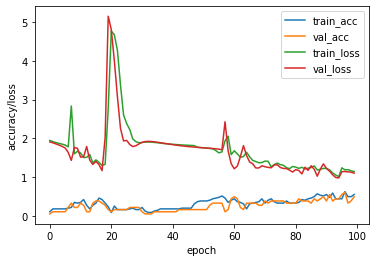

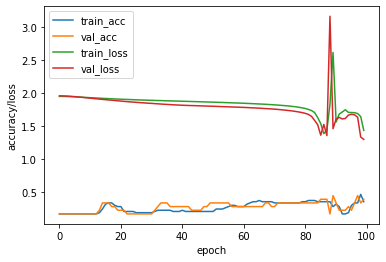

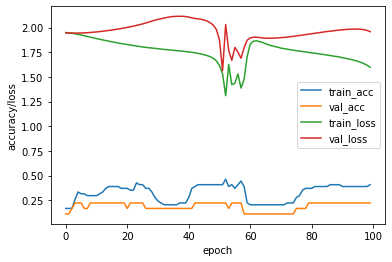

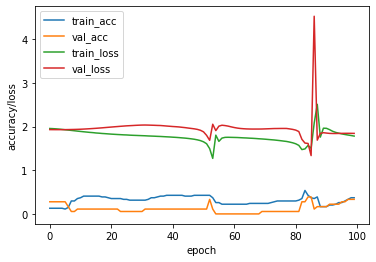

In [33]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [34]:
net3 = models.Sequential()
net3.add(layers.GRU(480, input_shape = (480,6)))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 480)               701280    
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 3367      
Total params: 704,647
Trainable params: 704,647
Non-trainable params: 0
_________________________________________________________________


In [35]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 6s 118ms/step - loss: 1.9581 - accuracy: 0.1852 - val_loss: 1.9221 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 6s 111ms/step - loss: 1.9170 - accuracy: 0.1852 - val_loss: 1.8750 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 6s 110ms/step - loss: 1.8879 - accuracy: 0.1852 - val_loss: 1.8436 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 6s 111ms/step - loss: 1.8578 - accuracy: 0.1852 - val_loss: 1.8122 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 6s 110ms/step - loss: 1.8327 - accuracy: 0.1852 - val_loss: 1.7674 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 6s 110ms/step - loss: 1.7644 - accuracy: 0.1852 - val_loss: 2.6112 - val_accuracy: 0.2778
Epoch 7/100
54/54 [==============================] - 6s 109ms/step - loss: 2.0811 - accuracy: 0.

54/54 [==============================] - 6s 108ms/step - loss: 1.9036 - accuracy: 0.1852 - val_loss: 1.8631 - val_accuracy: 0.2222
Epoch 14/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8997 - accuracy: 0.1667 - val_loss: 1.8555 - val_accuracy: 0.2222
Epoch 15/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8953 - accuracy: 0.1667 - val_loss: 1.8488 - val_accuracy: 0.2222
Epoch 16/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8925 - accuracy: 0.1667 - val_loss: 1.8420 - val_accuracy: 0.2222
Epoch 17/100
54/54 [==============================] - 6s 107ms/step - loss: 1.8890 - accuracy: 0.1667 - val_loss: 1.8358 - val_accuracy: 0.2222
Epoch 18/100
54/54 [==============================] - 6s 107ms/step - loss: 1.8857 - accuracy: 0.2037 - val_loss: 1.8298 - val_accuracy: 0.3333
Epoch 19/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8825 - accuracy: 0.2963 - val_loss: 1.8244 - val_accuracy: 0.3889
Epoch

Epoch 70/100
54/54 [==============================] - 6s 108ms/step - loss: 1.3347 - accuracy: 0.3889 - val_loss: 1.2435 - val_accuracy: 0.4444
Epoch 71/100
54/54 [==============================] - 6s 109ms/step - loss: 1.2781 - accuracy: 0.4259 - val_loss: 1.0664 - val_accuracy: 0.5556
Epoch 72/100
54/54 [==============================] - 6s 107ms/step - loss: 1.2129 - accuracy: 0.4444 - val_loss: 1.0153 - val_accuracy: 0.3889
Epoch 73/100
54/54 [==============================] - 6s 107ms/step - loss: 1.2327 - accuracy: 0.3519 - val_loss: 1.0075 - val_accuracy: 0.3889
Epoch 74/100
54/54 [==============================] - 6s 107ms/step - loss: 1.2074 - accuracy: 0.3519 - val_loss: 1.0417 - val_accuracy: 0.5000
Epoch 75/100
54/54 [==============================] - 6s 107ms/step - loss: 1.1636 - accuracy: 0.5370 - val_loss: 1.0922 - val_accuracy: 0.5000
Epoch 76/100
54/54 [==============================] - 6s 107ms/step - loss: 1.1435 - accuracy: 0.5370 - val_loss: 1.0725 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8185 - accuracy: 0.2037 - val_loss: 2.0612 - val_accuracy: 0.1111
Epoch 27/100
54/54 [==============================] - 6s 107ms/step - loss: 1.8167 - accuracy: 0.2037 - val_loss: 2.0684 - val_accuracy: 0.1111
Epoch 28/100
54/54 [==============================] - 6s 107ms/step - loss: 1.8124 - accuracy: 0.2037 - val_loss: 2.0744 - val_accuracy: 0.1111
Epoch 29/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8094 - accuracy: 0.2037 - val_loss: 2.0803 - val_accuracy: 0.1111
Epoch 30/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8074 - accuracy: 0.2037 - val_loss: 2.0871 - val_accuracy: 0.1111
Epoch 31/100
54/54 [==============================] - 6s 108ms/step - loss: 1.8047 - accuracy: 0.2037 - val_loss: 2.0934 - val_accuracy: 0.1111
Epoch 32/100
54/54 [==============================] - 6s 109ms/step - loss: 1.8031 - accuracy: 0.2037 - val_loss: 2.1006 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 6s 107ms/step - loss: 1.7019 - accuracy: 0.4074 - val_loss: 2.0786 - val_accuracy: 0.2222
Epoch 84/100
54/54 [==============================] - 6s 107ms/step - loss: 1.6929 - accuracy: 0.4074 - val_loss: 2.0748 - val_accuracy: 0.2222
Epoch 85/100
54/54 [==============================] - 6s 107ms/step - loss: 1.6845 - accuracy: 0.4074 - val_loss: 2.0702 - val_accuracy: 0.2222
Epoch 86/100
54/54 [==============================] - 6s 107ms/step - loss: 1.6696 - accuracy: 0.4074 - val_loss: 2.0597 - val_accuracy: 0.2222
Epoch 87/100
54/54 [==============================] - 6s 109ms/step - loss: 1.6479 - accuracy: 0.4074 - val_loss: 2.0396 - val_accuracy: 0.2222
Epoch 88/100
54/54 [==============================] - 6s 108ms/step - loss: 1.6131 - accuracy: 0.4074 - val_loss: 2.0027 - val_accuracy: 0.2222
Epoch 89/100
54/54 [==============================] - 6s 107ms/step - loss: 1.5216 - accuracy: 0.4074 - val_loss: 1.8898 - val_accuracy:

Epoch 95/100
54/54 [==============================] - 6s 107ms/step - loss: 1.1506 - accuracy: 0.4259 - val_loss: 1.4899 - val_accuracy: 0.1111
Epoch 96/100
54/54 [==============================] - 6s 108ms/step - loss: 1.1355 - accuracy: 0.4444 - val_loss: 1.4504 - val_accuracy: 0.1667
Epoch 97/100
54/54 [==============================] - 6s 109ms/step - loss: 1.1149 - accuracy: 0.5000 - val_loss: 1.7096 - val_accuracy: 0.3333
Epoch 98/100
54/54 [==============================] - 6s 108ms/step - loss: 1.1014 - accuracy: 0.5741 - val_loss: 1.7579 - val_accuracy: 0.3333
Epoch 99/100
54/54 [==============================] - 6s 107ms/step - loss: 1.2177 - accuracy: 0.6296 - val_loss: 1.7563 - val_accuracy: 0.3333
Epoch 100/100
15/15 [==============================] - 0s 29ms/step
[1.3791176080703735, 0.4000000059604645]


In [36]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [1.3578549  0.35000001]
Standard deviation for loss & accuracy:  [0.05933376 0.09860133]
Duration in seconds:  2330


In [37]:
#net3.save('enb38-3.h5')

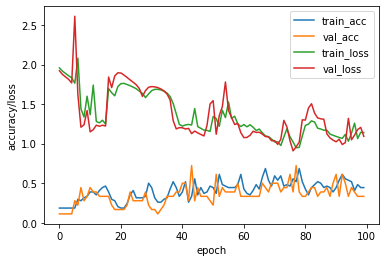

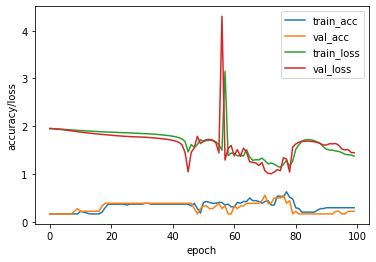

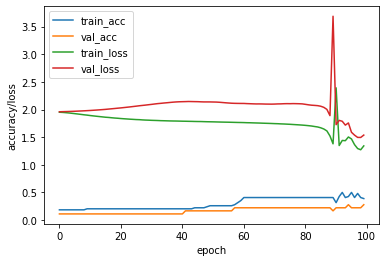

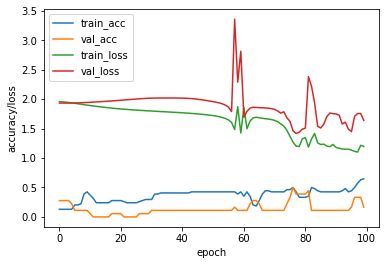

In [38]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [39]:
net4 = models.Sequential()
net4.add(layers.GRU(120, input_shape = (480,6)))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 120)               45720     
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 847       
Total params: 46,567
Trainable params: 46,567
Non-trainable params: 0
_________________________________________________________________


In [40]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 1s 21ms/step - loss: 1.9447 - accuracy: 0.1667 - val_loss: 1.9139 - val_accuracy: 0.1667
Epoch 2/100
54/54 [==============================] - 1s 13ms/step - loss: 1.9288 - accuracy: 0.1667 - val_loss: 1.9031 - val_accuracy: 0.1667
Epoch 3/100
54/54 [==============================] - 1s 13ms/step - loss: 1.9182 - accuracy: 0.1667 - val_loss: 1.8906 - val_accuracy: 0.1667
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 1.9085 - accuracy: 0.1667 - val_loss: 1.8788 - val_accuracy: 0.1667
Epoch 5/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8997 - accuracy: 0.1852 - val_loss: 1.8673 - val_accuracy: 0.1667
Epoch 6/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8921 - accuracy: 0.1852 - val_loss: 1.8569 - val_accuracy: 0.2778
Epoch 7/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8851 - accuracy: 0.2037 - 

54/54 [==============================] - 1s 13ms/step - loss: 1.1460 - accuracy: 0.5185 - val_loss: 1.1474 - val_accuracy: 0.5000
Epoch 59/100
54/54 [==============================] - 1s 13ms/step - loss: 1.1760 - accuracy: 0.5926 - val_loss: 1.2325 - val_accuracy: 0.4444
Epoch 60/100
54/54 [==============================] - 1s 13ms/step - loss: 1.1523 - accuracy: 0.5556 - val_loss: 1.1828 - val_accuracy: 0.3333
Epoch 61/100
54/54 [==============================] - 1s 13ms/step - loss: 1.1402 - accuracy: 0.6852 - val_loss: 1.1432 - val_accuracy: 0.3889
Epoch 62/100
54/54 [==============================] - 1s 13ms/step - loss: 1.1291 - accuracy: 0.6111 - val_loss: 1.1709 - val_accuracy: 0.5000
Epoch 63/100
54/54 [==============================] - 1s 13ms/step - loss: 1.0960 - accuracy: 0.6111 - val_loss: 1.1517 - val_accuracy: 0.5000
Epoch 64/100
54/54 [==============================] - 1s 13ms/step - loss: 1.1281 - accuracy: 0.5000 - val_loss: 1.1247 - val_accuracy: 0.3889
Epoch 65/100

54/54 [==============================] - 1s 14ms/step - loss: 1.8738 - accuracy: 0.3333 - val_loss: 1.8154 - val_accuracy: 0.3333
Epoch 72/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8729 - accuracy: 0.3519 - val_loss: 1.8147 - val_accuracy: 0.3333
Epoch 73/100
54/54 [==============================] - 1s 14ms/step - loss: 1.8723 - accuracy: 0.3519 - val_loss: 1.8139 - val_accuracy: 0.3333
Epoch 74/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8716 - accuracy: 0.3519 - val_loss: 1.8128 - val_accuracy: 0.3333
Epoch 75/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8709 - accuracy: 0.3519 - val_loss: 1.8119 - val_accuracy: 0.3333
Epoch 76/100
54/54 [==============================] - 1s 13ms/step - loss: 1.8702 - accuracy: 0.3704 - val_loss: 1.8109 - val_accuracy: 0.3333
Epoch 77/100
54/54 [==============================] - 1s 14ms/step - loss: 1.8696 - accuracy: 0.3704 - val_loss: 1.8099 - val_accuracy: 0.3333
Epoch 78/100

54/54 [==============================] - 1s 14ms/step - loss: 1.7478 - accuracy: 0.4259 - val_loss: 2.1126 - val_accuracy: 0.2222
Epoch 85/100
54/54 [==============================] - 1s 14ms/step - loss: 1.7460 - accuracy: 0.4259 - val_loss: 2.1130 - val_accuracy: 0.2222
Epoch 86/100
54/54 [==============================] - 1s 13ms/step - loss: 1.7442 - accuracy: 0.4259 - val_loss: 2.1121 - val_accuracy: 0.2222
Epoch 87/100
54/54 [==============================] - 1s 14ms/step - loss: 1.7425 - accuracy: 0.4074 - val_loss: 2.1100 - val_accuracy: 0.2222
Epoch 88/100
54/54 [==============================] - 1s 14ms/step - loss: 1.7410 - accuracy: 0.3889 - val_loss: 2.1080 - val_accuracy: 0.2222
Epoch 89/100
54/54 [==============================] - 1s 14ms/step - loss: 1.7381 - accuracy: 0.3889 - val_loss: 2.1039 - val_accuracy: 0.2222
Epoch 90/100
54/54 [==============================] - 1s 14ms/step - loss: 1.7358 - accuracy: 0.4074 - val_loss: 2.0990 - val_accuracy: 0.2222
Epoch 91/100

54/54 [==============================] - 1s 14ms/step - loss: 1.1925 - accuracy: 0.4074 - val_loss: 1.5158 - val_accuracy: 0.2778
Epoch 97/100
54/54 [==============================] - 1s 14ms/step - loss: 1.1691 - accuracy: 0.4630 - val_loss: 1.5043 - val_accuracy: 0.1667
Epoch 98/100
54/54 [==============================] - 1s 13ms/step - loss: 1.1645 - accuracy: 0.3889 - val_loss: 1.5077 - val_accuracy: 0.1667
Epoch 99/100
54/54 [==============================] - 1s 14ms/step - loss: 1.1620 - accuracy: 0.3889 - val_loss: 1.7157 - val_accuracy: 0.1667
Epoch 100/100
15/15 [==============================] - 0s 6ms/step
[1.325541615486145, 0.4000000059604645]


In [41]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [1.51753026 0.36666668]
Standard deviation for loss & accuracy:  [0.32354179 0.15275253]
Duration in seconds:  292


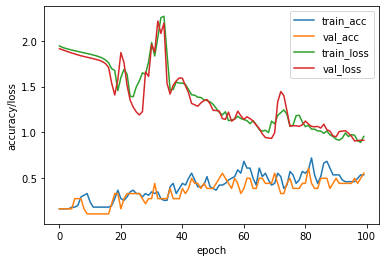

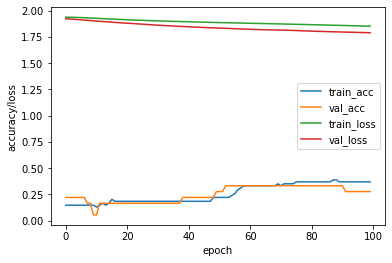

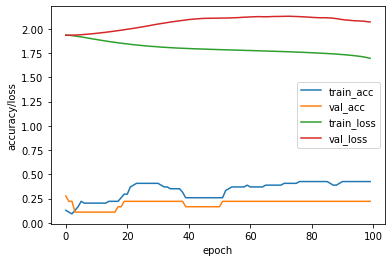

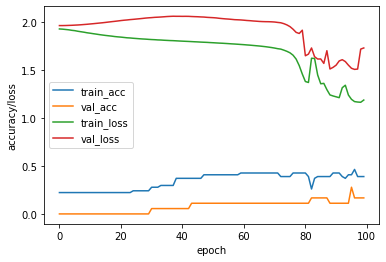

In [42]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
#net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
